# Simple transit model in Sherpa

Mostly to work on issue #59 in the repo, but this should definitley be converted into a tutorial at some point.

Make sure you update your configfile accordingly:

```ini
[setup]
data_set = simple_transit
```

In [1]:
# Imports
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import G

from sherpa.models import model
from sherpa.data import Data1D
from sherpa.plot import DataPlot
from sherpa.plot import ModelPlot
from sherpa.fit import Fit
from sherpa.stats import LeastSq
from sherpa.optmethods import LevMar
from sherpa.stats import Chi2
from sherpa.plot import FitPlot

os.chdir('../exotic-ism')
import margmodule as marg
from config import CONFIG_INI

## Test 0

Simple dataset with no additional scatter.

In [2]:
# Test parameters
planet_sys = CONFIG_INI.get('setup', 'data_set')
dtosec = CONFIG_INI.getfloat('constants', 'dtosec')
period = CONFIG_INI.getfloat(planet_sys, 'Per')
Per = period * dtosec
aor = CONFIG_INI.getfloat(planet_sys, 'aor')
constant1 = (G * Per * Per / (4 *np.pi * np.pi))**(1/3)
msmpr = (aor/(constant1))**3
print('msmpr: {}'.format(msmpr))
print('G: {}'.format(G.value))
print('Per: {} sec'.format(Per))

# limb darkening parameters
c1 = 0.0
c2 = 0.0
c3 = 0.0
c4 = 0.0

# Create x-array for phase - careful, this is not a regular grid, but consists of three groups of data points
data_x = np.array([-0.046, -0.044, -0.042, -0.040, -0.038, -0.036, -0.034,
                   -0.032, -0.030, -0.006, -0.004, -0.002, 0.0, 0.002, 0.004,
                   0.006, 0.008, 0.01, 0.032, 0.034, 0.036, 0.038, 0.040,
                   0.042, 0.044, 0.046,0.048])

# Make denser and REGULAR x grid for plotting of smooth model
smooth_x = np.arange(data_x[0], data_x[-1], 0.001)

# Initial flux data
data_y = np.array([1.0000000, 1.0000000, 1.0000000, 1.0000000, 1.0000000,
                   1.0000000, 1.0000000, 1.0000000, 1.0000000, 0.99000000,
                   0.99000000, 0.99000000, 0.99000000, 0.99000000, 0.99000000,
                   0.99000000, 0.99000000, 0.99000000, 1.0000000, 1.0000000,
                   1.0000000, 1.0000000, 1.0000000, 1.0000000, 1.0000000,
                   1.0000000, 1.0000000])

uncertainty = np.array([0.0004] * len(data_x))

msmpr: 2218.7014898879943 kg s2 / m3
G: 6.67408e-11
Per: 302400.0 sec


Text(0, 0.5, 'Flux')

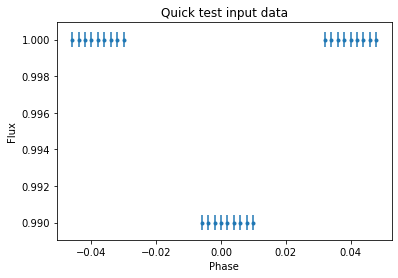

In [3]:
# Quick check of input data
plt.errorbar(data_x, data_y, yerr=uncertainty, fmt='.')
plt.title('Quick test input data')
plt.xlabel('Phase')
plt.ylabel('Flux')

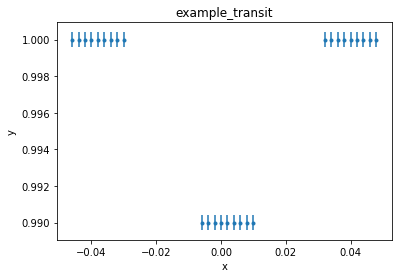

In [4]:
# Make Sherpa data object out of this
data0 = Data1D('example_transit', data_x, data_y, staterror=uncertainty)   # create data object
dplot0 = DataPlot()         # create data *plot* object
dplot0.prepare(data0)   # prepare plot
dplot0.plot()

In [5]:
# Create and visualize model
model0 = marg.Transit(data_x[0], msmpr, c1, c2, c3, c4, flux0=data_y[0], x_in_phase=True, name='transit', sh=None)
print(model0)

transit
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   transit.rl   thawed          0.1 -3.40282e+38  3.40282e+38           
   transit.flux0 thawed            1 -3.40282e+38  3.40282e+38           
   transit.epoch thawed            0 -3.40282e+38  3.40282e+38 days [MJD]
   transit.inclin thawed       1.5708 -3.40282e+38  3.40282e+38    radians
   transit.msmpr thawed       2218.7 -3.40282e+38  3.40282e+38           
   transit.ecc  thawed            0 -3.40282e+38  3.40282e+38    degrees
   transit.omega frozen            0 -3.40282e+38  3.40282e+38    degrees
   transit.period frozen          3.5 -3.40282e+38  3.40282e+38       days
   transit.tzero frozen       -0.046 -3.40282e+38  3.40282e+38 days [MJD]
   transit.c1   frozen            0 -3.40282e+38  3.40282e+38           
   transit.c2   frozen            0 -3.40282e+38  3.40282e+38           
   transit.c3   frozen            

In [6]:
# Freeze almost all parameters
model0.flux0.freeze()
model0.epoch.freeze()
model0.inclin.freeze()
model0.msmpr.freeze()
model0.ecc.freeze()
model0.m_fac.freeze()
model0.hstp1.freeze()
model0.hstp2.freeze()
model0.hstp3.freeze()
model0.hstp4.freeze()
model0.xshift1.freeze()
model0.xshift2.freeze()
model0.xshift3.freeze()
model0.xshift4.freeze()

print(model0)

transit
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   transit.rl   thawed          0.1 -3.40282e+38  3.40282e+38           
   transit.flux0 frozen            1 -3.40282e+38  3.40282e+38           
   transit.epoch frozen            0 -3.40282e+38  3.40282e+38 days [MJD]
   transit.inclin frozen       1.5708 -3.40282e+38  3.40282e+38    radians
   transit.msmpr frozen       2218.7 -3.40282e+38  3.40282e+38           
   transit.ecc  frozen            0 -3.40282e+38  3.40282e+38    degrees
   transit.omega frozen            0 -3.40282e+38  3.40282e+38    degrees
   transit.period frozen          3.5 -3.40282e+38  3.40282e+38       days
   transit.tzero frozen       -0.046 -3.40282e+38  3.40282e+38 days [MJD]
   transit.c1   frozen            0 -3.40282e+38  3.40282e+38           
   transit.c2   frozen            0 -3.40282e+38  3.40282e+38           
   transit.c3   frozen            

In [7]:
# Stick all parameters in one tuple so that we can use the calc() method below
params = (model0.rl.val, model0.flux0.val, model0.epoch.val, model0.inclin.val, model0.MsMpR.val,
          model0.ecc.val, model0.omega.val, model0.period.val, model0.tzero.val, model0.c1.val,
          model0.c2.val, model0.c3.val, model0.c4.val, model0.m_fac.val, model0.hstp1.val,
          model0.hstp2.val, model0.hstp3.val, model0.hstp4.val, model0.xshift1.val,
          model0.xshift2.val, model0.xshift3.val, model0.xshift4.val)

In [8]:
# Calculate model on denser grid to display (smooth model)
ytest = model0.calc(pars=params, x=smooth_x)

Text(0.5, 1.0, 'TEST: Smooth model over actual data, before fit')

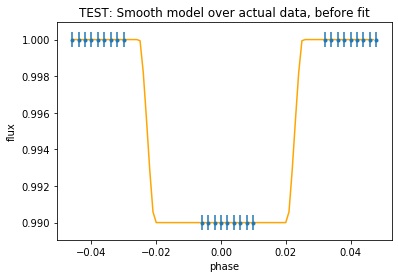

In [9]:
# Display model from denser grid over real data
plt.plot(smooth_x, ytest, c='orange')
plt.errorbar(data_x, data_y, yerr=uncertainty, fmt='.')
plt.xlabel('phase')
plt.ylabel('flux')
plt.title('TEST: Smooth model over actual data, before fit')

In [10]:
# This plot is useless
# print('This is not a good way of visualizing the model')
# mplot0 = ModelPlot()
# mplot0.prepare(data0, model0)
# mplot0.plot()

In [11]:
# As is this one
# Overplotting current model and data
# print('This is not a good way of visualizing the model')
# dplot0.plot()
# mplot0.overplot()

In [12]:
# Set up statistics and optimizer
stat = Chi2()
opt = LevMar()
opt.config['epsfcn'] = np.finfo(float).eps   # adjusting epsfcn to double precision
#print(stat)
print(opt)

# Set up fit
tfit0 = Fit(data0, model0, stat=stat, method=opt)
print('Fit information:')
print(tfit0)

name    = levmar
ftol    = 1.1920928955078125e-07
xtol    = 1.1920928955078125e-07
gtol    = 1.1920928955078125e-07
maxfev  = None
epsfcn  = 2.220446049250313e-16
factor  = 100.0
verbose = 0
Fit information:
data      = example_transit
model     = transit
stat      = Chi2
method    = LevMar
estmethod = Covariance


In [13]:
# Perform the fit
fitresult0 = tfit0.fit()

In [14]:
print(fitresult0)

datasets       = None
itermethodname = none
methodname     = levmar
statname       = chi2
succeeded      = True
parnames       = ('transit.rl',)
parvals        = (0.1,)
statval        = 0.0
istatval       = 0.0
dstatval       = 0.0
numpoints      = 27
dof            = 26
qval           = 1.0
rstat          = 0.0
message        = successful termination
nfev           = 2


### Final results and plot test 0

In [15]:
# Prepare smooth model of fit
# Stick all parameters in one tuple so that we can use method below
params0 = (model0.rl.val, model0.flux0.val, model0.epoch.val, model0.inclin.val, model0.MsMpR.val,
           model0.ecc.val, model0.omega.val, model0.period.val, model0.tzero.val, model0.c1.val,
           model0.c2.val, model0.c3.val, model0.c4.val, model0.m_fac.val, model0.hstp1.val,
           model0.hstp2.val, model0.hstp3.val, model0.hstp4.val, model0.xshift1.val,
           model0.xshift2.val, model0.xshift3.val, model0.xshift4.val)

# Calculate model on denser grid to display (smooth model)
smooth_y0 = model0.calc(pars=params0, x=smooth_x)

rl = 0.1 +/- 0.0006666668057442002
Reduced chi-squared: 0.0


Text(0.5, 1.0, 'Smooth model test 0 over actual data')

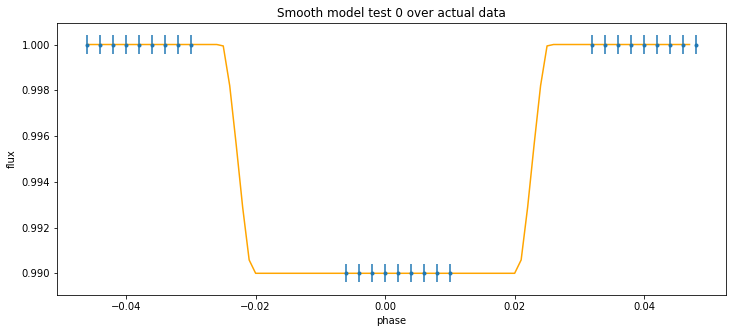

In [16]:
# Error from Hessian
calc_errors0 = np.sqrt(fitresult0.extra_output['covar'].diagonal())
rl_err0 = calc_errors0[0]

print('rl = {} +/- {}'.format(model0.rl.val, rl_err0))
print('Reduced chi-squared: {}'.format(fitresult0.rstat))

# Display model from denser grid over real data after fitting
plt.figure(figsize=(12, 5))
plt.plot(smooth_x, smooth_y0, c='orange')
plt.errorbar(data_x, data_y, yerr=uncertainty, fmt='.')
plt.xlabel('phase')
plt.ylabel('flux')
plt.title('Smooth model test 0 over actual data')

## Test 1

Simple dataset with additional scatter

In [17]:
random_scatter = np.array([0.32558253, -0.55610514, -1.1150768, -1.2337022, -1.2678875,
                           0.60321692, 1.1025507, 1.5080730, 0.76113001, 0.51978011,
                           0.72241364, -0.086782108, -0.22698337, 0.22780245, 0.47119014,
                           -2.1660677, -1.2477670, 0.28568456, 0.40292731, 0.077955817,
                           -1.1090623, 0.66895172, -0.59215439, 0.79973968, 1.0603756,
                           0.82684954, -1.8334587])
print(random_scatter.shape)

(27,)


In [18]:
# Add random scatter
original_y = np.copy(data_y)
data_y = original_y + (random_scatter * uncertainty)

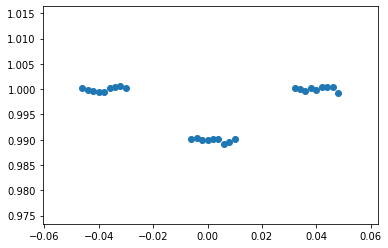

In [19]:
# Quick loop at scattered data
plt.scatter(data_x, data_y)

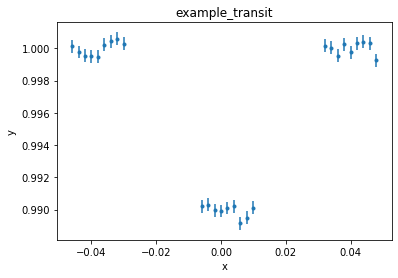

In [20]:
# Make Sherpa data obkect out of this
data1 = Data1D('example_transit', data_x, data_y, staterror=uncertainty)   # create data object
dplot1 = DataPlot()         # create data *plot* object
dplot1.prepare(data1)   # prepare plot
dplot1.plot()

In [21]:
# Create and visualize model
model1 = marg.Transit(data_x[0], msmpr, c1, c2, c3, c4, flux0=data_y[0], x_in_phase=True, name='transit', sh=None)
print(model1)

transit
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   transit.rl   thawed          0.1 -3.40282e+38  3.40282e+38           
   transit.flux0 thawed      1.00013 -3.40282e+38  3.40282e+38           
   transit.epoch thawed            0 -3.40282e+38  3.40282e+38 days [MJD]
   transit.inclin thawed       1.5708 -3.40282e+38  3.40282e+38    radians
   transit.msmpr thawed       2218.7 -3.40282e+38  3.40282e+38           
   transit.ecc  thawed            0 -3.40282e+38  3.40282e+38    degrees
   transit.omega frozen            0 -3.40282e+38  3.40282e+38    degrees
   transit.period frozen          3.5 -3.40282e+38  3.40282e+38       days
   transit.tzero frozen       -0.046 -3.40282e+38  3.40282e+38 days [MJD]
   transit.c1   frozen            0 -3.40282e+38  3.40282e+38           
   transit.c2   frozen            0 -3.40282e+38  3.40282e+38           
   transit.c3   frozen            

In [22]:
# Freeze almost all parameters
model1.flux0.freeze()
model1.epoch.freeze()
model1.inclin.freeze()
model1.msmpr.freeze()
model1.ecc.freeze()
model1.m_fac.freeze()
model1.hstp1.freeze()
model1.hstp2.freeze()
model1.hstp3.freeze()
model1.hstp4.freeze()
model1.xshift1.freeze()
model1.xshift2.freeze()
model1.xshift3.freeze()
model1.xshift4.freeze()

print(model1)

transit
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   transit.rl   thawed          0.1 -3.40282e+38  3.40282e+38           
   transit.flux0 frozen      1.00013 -3.40282e+38  3.40282e+38           
   transit.epoch frozen            0 -3.40282e+38  3.40282e+38 days [MJD]
   transit.inclin frozen       1.5708 -3.40282e+38  3.40282e+38    radians
   transit.msmpr frozen       2218.7 -3.40282e+38  3.40282e+38           
   transit.ecc  frozen            0 -3.40282e+38  3.40282e+38    degrees
   transit.omega frozen            0 -3.40282e+38  3.40282e+38    degrees
   transit.period frozen          3.5 -3.40282e+38  3.40282e+38       days
   transit.tzero frozen       -0.046 -3.40282e+38  3.40282e+38 days [MJD]
   transit.c1   frozen            0 -3.40282e+38  3.40282e+38           
   transit.c2   frozen            0 -3.40282e+38  3.40282e+38           
   transit.c3   frozen            

In [23]:
# The useles plot
# mplot1 = ModelPlot()
# mplot1.prepare(data1, model1)
# mplot1.plot()

In [24]:
# Overplotting current model and data
# dplot1.plot()
# mplot1.overplot()

In [25]:
# Set up fit
tfit1 = Fit(data1, model1, stat=stat, method=opt)
print('Fit information:')
print(tfit1)

Fit information:
data      = example_transit
model     = transit
stat      = Chi2
method    = LevMar
estmethod = Covariance


In [26]:
# Perform the fit
fitresult1 = tfit1.fit()
print(fitresult1)

datasets       = None
itermethodname = none
methodname     = levmar
statname       = chi2
succeeded      = True
parnames       = ('transit.rl',)
parvals        = (0.10097328512645733,)
statval        = 26.060421525048007
istatval       = 28.213165463525648
dstatval       = 2.1527439384776414
numpoints      = 27
dof            = 26
qval           = 0.45978727353039944
rstat          = 1.0023239048095387
message        = successful termination
nfev           = 6


### Final results and plot test 1

In [27]:
# Prepare smooth model of fit
# Stick all parameters in one tuple so that we can use method below
params1 = (model1.rl.val, model1.flux0.val, model1.epoch.val, model1.inclin.val, model1.MsMpR.val,
           model1.ecc.val, model1.omega.val, model1.period.val, model1.tzero.val, model1.c1.val,
           model1.c2.val, model1.c3.val, model1.c4.val, model1.m_fac.val, model1.hstp1.val,
           model1.hstp2.val, model1.hstp3.val, model1.hstp4.val, model1.xshift1.val,
           model1.xshift2.val, model1.xshift3.val, model1.xshift4.val)

# Calculate model on denser grid to display (smooth model)
smooth_y1 = model1.calc(pars=params1, x=smooth_x)

rl = 0.10097328512645733 +/- 0.0006601544569321049
Reduced chi-squared: 1.0023239048095387


Text(0.5, 1.0, 'Smooth model test 1 over actual data')

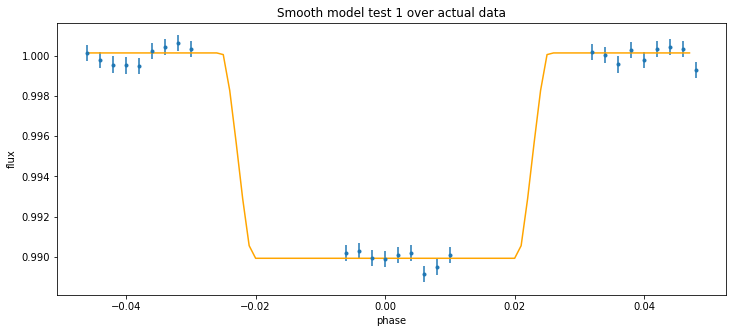

In [28]:
# Error from Hessian
calc_errors1 = np.sqrt(fitresult1.extra_output['covar'].diagonal())
rl_err1 = calc_errors1[0]

# Results
print('rl = {} +/- {}'.format(model1.rl.val, rl_err1))
print('Reduced chi-squared: {}'.format(fitresult1.rstat))

# Display model from denser grid over real data after fitting
plt.figure(figsize=(12, 5))
plt.plot(smooth_x, smooth_y1, c='orange')
plt.errorbar(data_x, data_y, yerr=uncertainty, fmt='.')
plt.xlabel('phase')
plt.ylabel('flux')
plt.title('Smooth model test 1 over actual data')

## Test 2

Simple dataset with additional scatter and set limb-darkening coefficients

In [29]:
# Limb darkening setup
# Values just copied directly from:
# https://github.com/hrwakeford/ExoTiC-ISM/issues/59#issuecomment-533657499

c1 = 0.66396105
c2 = -0.12617095
c3 = 0.053649047
c4 = -0.026713433

# To make sure we use the same numbers, I will just copy the IDL data from here:
# https://github.com/hrwakeford/ExoTiC-ISM/issues/59#issuecomment-533657499
data_y = [1.0001302, 0.99977756, 0.99955397, 0.99950652, 0.99949285, 1.0002413,
          1.0004410, 1.0006032, 1.0003045, 0.98918739, 0.98921560, 0.98886110,
          0.98879472, 0.98898693, 0.98911511, 0.98811305, 0.98855772, 0.98927710,
          1.0001612, 1.0000312, 0.99955638, 1.0002676, 0.99976314, 1.0003199,
          1.0004242, 1.0003307, 0.99926662]

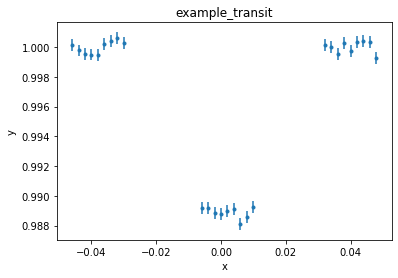

In [30]:
# Make Sherpa data obkect out of this
data2 = Data1D('example_transit', data_x, data_y, staterror=uncertainty)   # create data object
dplot2 = DataPlot()         # create data *plot* object
dplot2.prepare(data2)   # prepare plot
dplot2.plot()

In [31]:
# Create and visualize model
model2 = marg.Transit(data_x[0], msmpr, c1, c2, c3, c4, flux0=data_y[0], x_in_phase=True, name='transit', sh=None)
print(model2)

transit
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   transit.rl   thawed          0.1 -3.40282e+38  3.40282e+38           
   transit.flux0 thawed      1.00013 -3.40282e+38  3.40282e+38           
   transit.epoch thawed            0 -3.40282e+38  3.40282e+38 days [MJD]
   transit.inclin thawed       1.5708 -3.40282e+38  3.40282e+38    radians
   transit.msmpr thawed       2218.7 -3.40282e+38  3.40282e+38           
   transit.ecc  thawed            0 -3.40282e+38  3.40282e+38    degrees
   transit.omega frozen            0 -3.40282e+38  3.40282e+38    degrees
   transit.period frozen          3.5 -3.40282e+38  3.40282e+38       days
   transit.tzero frozen       -0.046 -3.40282e+38  3.40282e+38 days [MJD]
   transit.c1   frozen     0.663961 -3.40282e+38  3.40282e+38           
   transit.c2   frozen    -0.126171 -3.40282e+38  3.40282e+38           
   transit.c3   frozen     0.05364

In [32]:
# Freeze almost all parameters
model2.flux0.freeze()
model2.epoch.freeze()
model2.inclin.freeze()
model2.msmpr.freeze()
model2.ecc.freeze()
model2.m_fac.freeze()
model2.hstp1.freeze()
model2.hstp2.freeze()
model2.hstp3.freeze()
model2.hstp4.freeze()
model2.xshift1.freeze()
model2.xshift2.freeze()
model2.xshift3.freeze()
model2.xshift4.freeze()

print(model2)

transit
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   transit.rl   thawed          0.1 -3.40282e+38  3.40282e+38           
   transit.flux0 frozen      1.00013 -3.40282e+38  3.40282e+38           
   transit.epoch frozen            0 -3.40282e+38  3.40282e+38 days [MJD]
   transit.inclin frozen       1.5708 -3.40282e+38  3.40282e+38    radians
   transit.msmpr frozen       2218.7 -3.40282e+38  3.40282e+38           
   transit.ecc  frozen            0 -3.40282e+38  3.40282e+38    degrees
   transit.omega frozen            0 -3.40282e+38  3.40282e+38    degrees
   transit.period frozen          3.5 -3.40282e+38  3.40282e+38       days
   transit.tzero frozen       -0.046 -3.40282e+38  3.40282e+38 days [MJD]
   transit.c1   frozen     0.663961 -3.40282e+38  3.40282e+38           
   transit.c2   frozen    -0.126171 -3.40282e+38  3.40282e+38           
   transit.c3   frozen     0.05364

In [33]:
# Still useless...
# mplot2 = ModelPlot()
# mplot2.prepare(data2, model2)
# mplot2.plot()

In [34]:
# Overplotting current model and data
# dplot2.plot()
# mplot2.overplot()

In [35]:
# Set up fit
tfit2 = Fit(data2, model2, stat=stat, method=opt)
print('Fit information:')
print(tfit2)

Fit information:
data      = example_transit
model     = transit
stat      = Chi2
method    = LevMar
estmethod = Covariance


In [36]:
# Perform the fit
fitresult2 = tfit2.fit()
print(fitresult2)

datasets       = None
itermethodname = none
methodname     = levmar
statname       = chi2
succeeded      = True
parnames       = ('transit.rl',)
parvals        = (0.10088074234965887,)
statval        = 26.06987299632367
istatval       = 28.20850060757801
dstatval       = 2.138627611254339
numpoints      = 27
dof            = 26
qval           = 0.4592690467320147
rstat          = 1.0026874229355258
message        = successful termination
nfev           = 6


### Final results and plot test 2

In [37]:
# Prepare smooth model of fit
# Stick all parameters in one tuple so that we can use method below
params2 = (model2.rl.val, model2.flux0.val, model2.epoch.val, model2.inclin.val, model2.MsMpR.val,
           model2.ecc.val, model2.omega.val, model2.period.val, model2.tzero.val, model2.c1.val,
           model2.c2.val, model2.c3.val, model2.c4.val, model2.m_fac.val, model2.hstp1.val,
           model2.hstp2.val, model2.hstp3.val, model2.hstp4.val, model2.xshift1.val,
           model2.xshift2.val, model2.xshift3.val, model2.xshift4.val)

# Calculate model on denser grid to display (smooth model)
smooth_y2 = model2.calc(pars=params2, x=smooth_x)

rl = 0.10088074234965887 +/- 0.0005996366661930596
Reduced chi-squared: 1.0026874229355258


Text(0.5, 1.0, 'Smooth model test 2 over actual data')

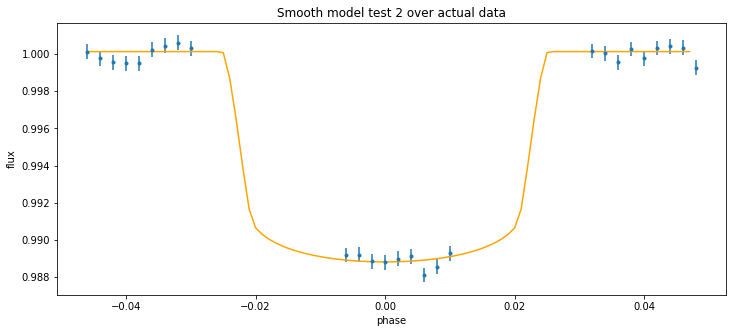

In [38]:
# Error from Hessian
calc_errors2 = np.sqrt(fitresult2.extra_output['covar'].diagonal())
rl_err2 = calc_errors2[0]

# Results
print('rl = {} +/- {}'.format(model2.rl.val, rl_err2))
print('Reduced chi-squared: {}'.format(fitresult2.rstat))

# Display model from denser grid over real data after fitting
plt.figure(figsize=(12, 5))
plt.plot(smooth_x, smooth_y2, c='orange')
plt.errorbar(data_x, data_y, yerr=uncertainty, fmt='.')
plt.xlabel('phase')
plt.ylabel('flux')
plt.title('Smooth model test 2 over actual data')

## Test 3

Simple dataset with additional scatter, set limb-darkening coefficients, and a linear slope

In [39]:
# Create linear slope
m_fac = 0.04
line = (data_x * m_fac) + 1.00

# Add to y data
#second_y = np.copy(data_y)
#data_y = line * (second_y + (random_scatter*uncertainty))

# To make sure we use the same numbers, I will just copy the IDL data from here:
# https://github.com/hrwakeford/ExoTiC-ISM/issues/59#issuecomment-533665365
data_y = np.array([0.99929017, 0.99901777, 0.99887430, 0.99890683,
                   0.99897318, 0.99980124, 1.0000809, 1.0003231,
                   1.0001044, 0.98993925, 0.99004661, 0.98977091, 0.98978356,
                   0.99005507, 0.99026251, 0.98933832, 0.98986262, 0.99066208, 
                   1.0024415, 1.0023914, 1.0019954, 1.0027883, 1.0023626,
                   1.0030008, 1.0031854, 1.0031717, 1.0021845])

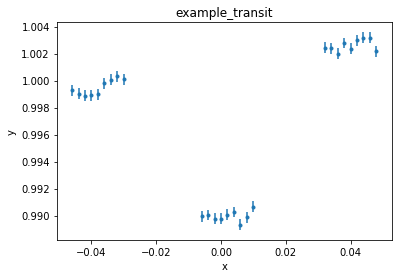

In [40]:
# Make Sherpa data obkect out of this
data3 = Data1D('example_transit', data_x, data_y, staterror=uncertainty)   # create data object
dplot3 = DataPlot()         # create data *plot* object
dplot3.prepare(data3)   # prepare plot
dplot3.plot()

In [41]:
# Create and visualize model
model3 = marg.Transit(data_x[0], msmpr, c1, c2, c3, c4, flux0=data_y[0], x_in_phase=True, name='transit', sh=None)
print(model3)

transit
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   transit.rl   thawed          0.1 -3.40282e+38  3.40282e+38           
   transit.flux0 thawed      0.99929 -3.40282e+38  3.40282e+38           
   transit.epoch thawed            0 -3.40282e+38  3.40282e+38 days [MJD]
   transit.inclin thawed       1.5708 -3.40282e+38  3.40282e+38    radians
   transit.msmpr thawed       2218.7 -3.40282e+38  3.40282e+38           
   transit.ecc  thawed            0 -3.40282e+38  3.40282e+38    degrees
   transit.omega frozen            0 -3.40282e+38  3.40282e+38    degrees
   transit.period frozen          3.5 -3.40282e+38  3.40282e+38       days
   transit.tzero frozen       -0.046 -3.40282e+38  3.40282e+38 days [MJD]
   transit.c1   frozen     0.663961 -3.40282e+38  3.40282e+38           
   transit.c2   frozen    -0.126171 -3.40282e+38  3.40282e+38           
   transit.c3   frozen     0.05364

Note how the parameter `m_fac` has a starting value of 0 in the model, so that we don't bias the fit towards the real values used to generate the data.

In [42]:
# Freeze almost all parameters
# Note how m_fac stays thawed
model3.flux0.freeze()
model3.epoch.freeze()
model3.inclin.freeze()
model3.msmpr.freeze()
model3.ecc.freeze()
model3.hstp1.freeze()
model3.hstp2.freeze()
model3.hstp3.freeze()
model3.hstp4.freeze()
model3.xshift1.freeze()
model3.xshift2.freeze()
model3.xshift3.freeze()
model3.xshift4.freeze()

print(model3)

transit
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   transit.rl   thawed          0.1 -3.40282e+38  3.40282e+38           
   transit.flux0 frozen      0.99929 -3.40282e+38  3.40282e+38           
   transit.epoch frozen            0 -3.40282e+38  3.40282e+38 days [MJD]
   transit.inclin frozen       1.5708 -3.40282e+38  3.40282e+38    radians
   transit.msmpr frozen       2218.7 -3.40282e+38  3.40282e+38           
   transit.ecc  frozen            0 -3.40282e+38  3.40282e+38    degrees
   transit.omega frozen            0 -3.40282e+38  3.40282e+38    degrees
   transit.period frozen          3.5 -3.40282e+38  3.40282e+38       days
   transit.tzero frozen       -0.046 -3.40282e+38  3.40282e+38 days [MJD]
   transit.c1   frozen     0.663961 -3.40282e+38  3.40282e+38           
   transit.c2   frozen    -0.126171 -3.40282e+38  3.40282e+38           
   transit.c3   frozen     0.05364

In [43]:
# ...
# mplot3 = ModelPlot()
# mplot3.prepare(data3, model3)
# mplot3.plot()

In [44]:
# Overplotting current model and data
# dplot3.plot()
# mplot3.overplot()

In [45]:
# Set up fit
tfit3 = Fit(data3, model3, stat=stat, method=opt)
print('Fit information:')
print(tfit3)

Fit information:
data      = example_transit
model     = transit
stat      = Chi2
method    = LevMar
estmethod = Covariance


In [46]:
# Perform the fit
fitresult3 = tfit3.fit()
print(fitresult3)

datasets       = None
itermethodname = none
methodname     = levmar
statname       = chi2
succeeded      = True
parnames       = ('transit.rl', 'transit.m_fac')
parvals        = (0.09234342060811525, 0.041289855115730856)
statval        = 356.7405123603774
istatval       = 818.9348721332243
dstatval       = 462.1943597728469
numpoints      = 27
dof            = 25
qval           = 2.077460172244262e-60
rstat          = 14.269620494415097
message        = successful termination
nfev           = 10


### Final results and plot test 3

In [47]:
# Prepare smooth model of fit
# Stick all parameters in one tuple so that we can use method below
params3 = (model3.rl.val, model3.flux0.val, model3.epoch.val, model3.inclin.val, model3.MsMpR.val,
           model3.ecc.val, model3.omega.val, model3.period.val, model3.tzero.val, model3.c1.val,
           model3.c2.val, model3.c3.val, model3.c4.val, model3.m_fac.val, model3.hstp1.val,
           model3.hstp2.val, model3.hstp3.val, model3.hstp4.val, model3.xshift1.val,
           model3.xshift2.val, model3.xshift3.val, model3.xshift4.val)

# Calculate model on denser grid to display (smooth model)
smooth_y3 = model3.calc(pars=params3, x=smooth_x)

rl = 0.09234342060811525 +/- 0.0006557666333904805
m_fac = 0.041289855115730856 +/- 0.002387368644610102
Reduced chi-squared: 14.269620494415097


Text(0.5, 1.0, 'Smooth model test 3 over actual data')

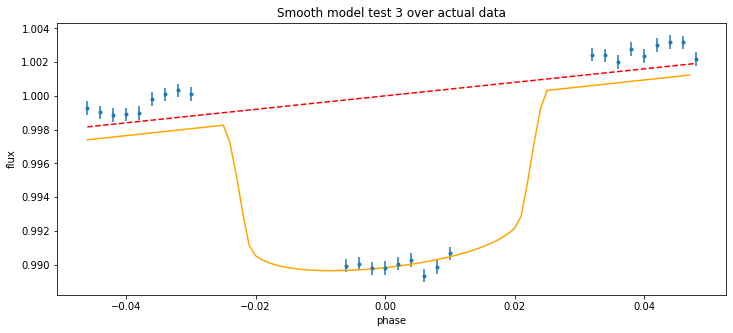

In [48]:
# Errors from Hessian
calc_errors3 = np.sqrt(fitresult3.extra_output['covar'].diagonal())
rl_err3 = calc_errors3[0]
m_fac_err3 = calc_errors3[1]

# Results
print('rl = {} +/- {}'.format(model3.rl.val, rl_err3))
print('m_fac = {} +/- {}'.format(model3.m_fac.val, m_fac_err3))
print('Reduced chi-squared: {}'.format(fitresult3.rstat))

# Display model from denser grid over real data after fitting
plt.figure(figsize=(12, 5))
plt.plot(smooth_x, smooth_y3, c='orange')
plt.errorbar(data_x, data_y, yerr=uncertainty, fmt='.')
plt.plot(data_x, line, c='r', linestyle='dashed')
plt.xlabel('phase')
plt.ylabel('flux')
plt.title('Smooth model test 3 over actual data')